In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_properties = pd.read_csv('./data/properties_2016.csv')

C:\Users\ashet\AppData\Local\Temp\ipykernel_21724\1644694603.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_properties = pd.read_csv('properties_2016.csv')


In [85]:
df_2016 = pd.read_csv('./data/train_2016_v2.csv', parse_dates=["transactiondate"])
df_2017 = pd.read_csv('./data/train_2017.csv', parse_dates=["transactiondate"])

In [7]:
df_logs = pd.concat([df_2016, df_2017])
df_logs

,parcelid,logerror,transactiondate
0,11016594,0.027600,2016-01-01
1,14366692,-0.168400,2016-01-01
2,12098116,-0.004000,2016-01-01
3,12643413,0.021800,2016-01-02
4,14432541,-0.005000,2016-01-02
...,...,...,...
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21


### Merge the main properties table with the properties transaction tables

In [26]:
df_all = pd.merge(df_logs, df_properties, on='parcelid', how='inner')

In [63]:
df_all

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.027600,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.168400,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.004000,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.021800,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.005000,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,143178.0,203793.0,2015.0,60615.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,69852.0,349295.0,2015.0,279443.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,49923.0,66198.0,2015.0,16275.0,1065.18,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,32305.0,48803.0,2015.0,16498.0,876.43,NaN,NaN,6.037434e+13


<Figure size 1200x1200 with 0 Axes>

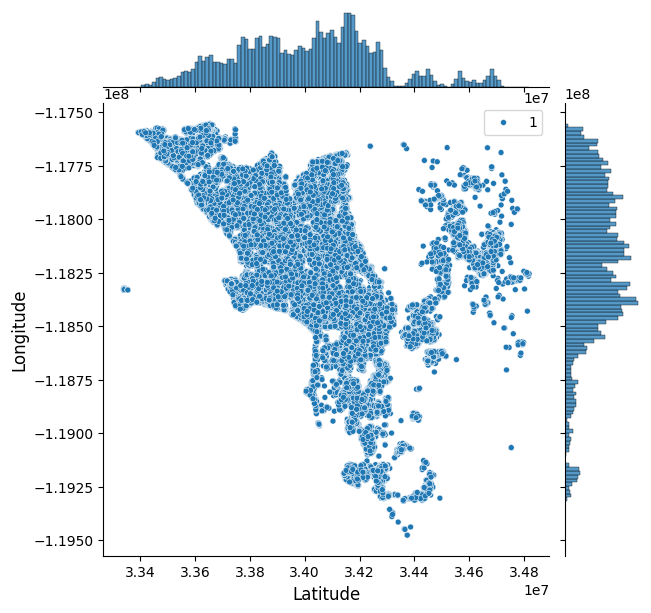

In [30]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_all.latitude.values, y=df_all.longitude.values, size=1)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [36]:
(df_all.isnull().sum().sort_values(ascending=False))

buildingclasstypeid             167857
finishedsquarefeet13            167813
storytypeid                     167795
basementsqft                    167795
yardbuildingsqft26              167723
fireplaceflag                   167494
architecturalstyletypeid        167420
typeconstructiontypeid          167366
finishedsquarefeet6             167067
decktypeid                      166626
poolsizesum                     166050
pooltypeid10                    165674
pooltypeid2                     165638
hashottuborspa                  163424
taxdelinquencyyear              163204
taxdelinquencyflag              163204
yardbuildingsqft17              162897
finishedsquarefeet15            161305
finishedfloor1squarefeet        155019
finishedsquarefeet50            155019
fireplacecnt                    150003
threequarterbathnbr             145858
pooltypeid7                     136699
poolcnt                         134449
numberofstories                 129744
airconditioningtypeid    

In [64]:
df_all[df_all.regionidcounty.isnull()]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
92546,13027343,0.080080,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93065,13027307,0.053119,2017-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94293,13027303,-0.010244,2017-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94458,167637054,-0.217256,2017-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95259,14197244,0.014172,2017-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166282,167637192,0.071681,2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166892,11784034,0.025360,2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167472,12000984,-0.554524,2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167639,12213962,0.018535,2017-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove all rows where latitude and longitude are missing

In [82]:
df_final = df_all[~df_all.regionidcounty.isnull()]

In [45]:
# The final missing values

(df_final.isnull().sum().sort_values(ascending=False))

buildingclasstypeid             167733
finishedsquarefeet13            167689
storytypeid                     167671
basementsqft                    167671
yardbuildingsqft26              167599
fireplaceflag                   167370
architecturalstyletypeid        167296
typeconstructiontypeid          167242
finishedsquarefeet6             166943
decktypeid                      166502
poolsizesum                     165926
pooltypeid10                    165550
pooltypeid2                     165514
hashottuborspa                  163300
taxdelinquencyyear              163080
taxdelinquencyflag              163080
yardbuildingsqft17              162773
finishedsquarefeet15            161181
finishedfloor1squarefeet        154895
finishedsquarefeet50            154895
fireplacecnt                    149879
threequarterbathnbr             145734
pooltypeid7                     136575
poolcnt                         134325
numberofstories                 129620
airconditioningtypeid    

1. We might be able to get regionidzip, regionidcity, censustractandblock - I'll work on this
2. The number of missing for garagearcnt and garagetotalsqft is the same, but there are explicit zeros? This is a little more tricky so we'll get back to this later

In [48]:
print(df_final.fireplaceflag.value_counts())
print(df_final.threequarterbathnbr.value_counts())
print(df_final.buildingclasstypeid.value_counts())

fireplaceflag
True    394
Name: count, dtype: int64
threequarterbathnbr
1.0    21852
2.0      162
3.0       14
4.0        1
7.0        1
Name: count, dtype: int64
buildingclasstypeid
4.0    30
3.0     1
Name: count, dtype: int64


In [65]:
print(df_final.poolcnt.value_counts())
print(df_final.storytypeid.value_counts())
print(df_final.typeconstructiontypeid.value_counts())

poolcnt
1.0    33439
Name: count, dtype: int64
storytypeid
7.0    93
Name: count, dtype: int64
typeconstructiontypeid
6.0     516
4.0       3
13.0      2
10.0      1
Name: count, dtype: int64


In [57]:
print(df_final.numberofstories.value_counts())
print(df_final.airconditioningtypeid.value_counts())
print(df_final.garagecarcnt.value_counts())

numberofstories
1.0    22409
2.0    14788
3.0      944
4.0        2
6.0        1
Name: count, dtype: int64
airconditioningtypeid
1.0     49790
13.0     3409
5.0       382
11.0      116
9.0         1
3.0         1
Name: count, dtype: int64
garagecarcnt
2.0     40435
1.0     12360
3.0      1292
0.0       535
4.0       516
5.0        96
6.0        30
7.0        15
8.0         9
9.0         8
10.0        5
11.0        3
13.0        2
14.0        2
24.0        1
Name: count, dtype: int64


In [62]:
df_final[['garagetotalsqft']][df_final.garagetotalsqft==0.0]

,garagetotalsqft
7,0.0
8,0.0
9,0.0
16,0.0
27,0.0
...,...
167385,0.0
167402,0.0
167412,0.0
167423,0.0


### Showing all properties where a property was sold more than once

In [67]:
v = df_final.parcelid.value_counts()
df_final[df_final.parcelid.isin(v.index[v.gt(2)])]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10416,17237150,0.213500,2016-02-19,NaN,NaN,NaN,3.0,4.0,NaN,NaN,...,2.0,NaN,121000.0,581000.0,2015.0,460000.0,6651.40,NaN,NaN,6.111008e+13
10417,17237150,0.288900,2016-07-11,NaN,NaN,NaN,3.0,4.0,NaN,NaN,...,2.0,NaN,121000.0,581000.0,2015.0,460000.0,6651.40,NaN,NaN,6.111008e+13
15385,17164212,-0.080100,2016-03-10,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,117000.0,333000.0,2015.0,216000.0,4148.26,NaN,NaN,6.111009e+13
15386,17164212,-0.018200,2016-08-12,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,117000.0,333000.0,2015.0,216000.0,4148.26,NaN,NaN,6.111009e+13
20217,14010551,1.021000,2016-03-29,NaN,NaN,NaN,1.0,3.0,NaN,NaN,...,1.0,NaN,38891.0,364814.0,2015.0,325923.0,4781.20,NaN,NaN,6.059088e+13
33582,14672826,-0.013100,2016-05-10,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,NaN,NaN,136288.0,753176.0,2015.0,616888.0,8295.40,NaN,NaN,6.059063e+13
33583,14672826,0.007000,2016-09-29,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,NaN,NaN,136288.0,753176.0,2015.0,616888.0,8295.40,NaN,NaN,6.059063e+13
48461,12478591,0.424000,2016-06-23,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,366900.0,650000.0,2015.0,283100.0,7204.93,NaN,NaN,6.037554e+13
55794,11842707,-0.028400,2016-07-14,NaN,NaN,NaN,2.0,3.0,NaN,7.0,...,NaN,NaN,10245.0,614764.0,2015.0,604519.0,17087.75,NaN,NaN,6.037482e+13
55795,11842707,0.057300,2016-08-22,NaN,NaN,NaN,2.0,3.0,NaN,7.0,...,NaN,NaN,10245.0,614764.0,2015.0,604519.0,17087.75,NaN,NaN,6.037482e+13


(0.0, 200000.0)

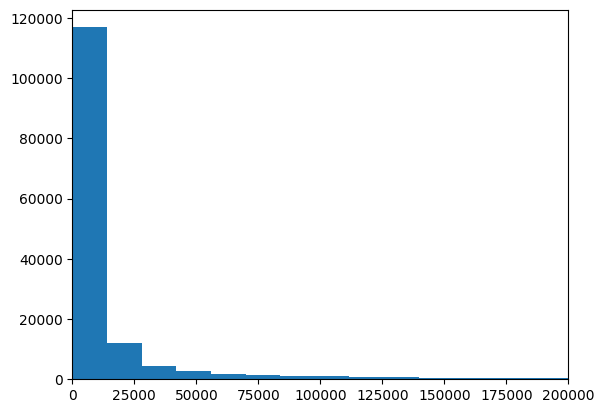

In [75]:
plt.hist(df_final.lotsizesquarefeet, bins=500)
plt.xlim(0,200000)

In [83]:
# Probably remove this row
df_final[df_final.taxvaluedollarcnt.isnull()]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
68986,17190827,-0.3011,2016-08-23,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,NaN,NaN,2015.0,NaN,51.4,NaN,NaN,6.111006e+13
